<div style="text-align: center;">

# 🚀 Littering Detection Model  
## Finetuning & Evaluation  

</div>


## 📑 Table of Contents

- [🚀 Littering Detection Model](#🚀-littering-detection-model)
  - [Finetuning & Evaluation](#finetuning-&-evaluation)
  - [📌 Introduction](##📌-introduction)
  - [📑 Table of Contents](#📑-table-of-contents)
  - [Importations](#importations)
  
    - [Landing AI Vision Agent](#landing-ai-vision-agent)
  - [🔍 Using the Vision AI Agent](#🔍-using-the-vision-ai-agent)
  - [📌 Success of Annotations](#📌-success-of-annotations)
  - [🏷️ Proceeding to Full Dataset Annotation](#🏷️-proceeding-to-full-dataset-annotation)
  - [🏷️ Converting Annotations to YOLO Format for Fine-Tuning](#🏷️-converting-annotations-to-yolo-format-for-fine-tuning)
  - [📄 Creating the Dataset Structure & YAML Configuration for YOLO](#📄-creating-the-dataset-structure-&-yaml-configuration-for-yolo)
  - [🎯 Training YOLOv8 on Custom Littering Dataset](#🎯-training-yolov8-on-custom-littering-dataset)
  - [📊 Model Evaluation and Performance Analysis](#📊-model-evaluation-and-performance-analysis)
    - [**🔍 Key Evaluation Metrics:**](#**🔍-key-evaluation-metrics:**)
    - [**📌 Results Summary**](#**📌-results-summary**)
    - [**📈 Performance Insights:**](#**📈-performance-insights:**)
  - [🎯 Testing the Fine-Tuned YOLO Model](#🎯-testing-the-fine-tuned-yolo-model)
  - [📌 Detection Results Analysis](#📌-detection-results-analysis)


## 📌 Introduction
This project involves **fine-tuning a YOLOv8 model** to detect littering behavior in images.The dataset consists of **images annotated with objects like people, garbage, litter, and trash**. 
The model was trained, validated, and tested to ensure accurate detection. This document summarizes the **steps taken to prepare the dataset, train YOLO, and evaluate the model**.


## Importations

in this section we import all necessary libraries and packages that are used for our project

In [ ]:
import sys
sys.path.append("Landing_ai_agent\convert_to_jpg.py")
sys.path.append("Landing_ai_agent\detect_object.py")

import os #  to walk through and modify directories 
import requests # to handle api calls
import pandas as pd # data processing
import json # working with json format
import shutil  # dealing with paths 
import cv2 # computer vision tasks 
import matplotlib.pyplot as plt # plotting  results 
from PIL import Image, ImageDraw #processing images 
from sklearn.model_selection import train_test_split # dividing data
from ultralytics import YOLO #model to finetune 
from dotenv import load_dotenv # loading the  .env content
#from test_env import  convert_to_jpg
from convert_to_jpg import convert_to_jpg # used to convert the images format to jpg if needed 
#from test_env import detect_objects #  used for detecting object using ai agent 
from detect_object import detect_objects


ModuleNotFoundError: No module named 'convert_to_jpg'




  ## Annotation Task  
###  Landing AI Vision Agent 




## 🔍 Using the Vision AI Agent

In this project, I utilized the **Landing AI Vision Agent** to enhance object detection for **littering analysis**. The agent was instrumental in:

- **Processing input images** and detecting objects such as **people, garbage, litter, and trash**.
- **Generating bounding box annotations** for the detected objects.
- **Automatically analyzing images** to classify **littering vs. non-littering behavior**.
- **Extracting detection results** into a structured format for further processing.

The **Vision AI Agent's API** was seamlessly integrated into the pipeline, enabling automated **batch processing** over a folder of images. The detection outputs were then **converted into YOLO annotation format**, allowing me to fine-tune a custom YOLO model for more accurate **littering detection**.



In [1]:
# 🛠️ Testing Object Detection
# -------------------
from dotenv import load_dotenv
load_dotenv(override=True)
api_key = os.getenv("API_key")  # Make sure variable names are inside quotes
api_url = os.getenv("API_url")

print(f"API Key: {api_key}")  
print(f"API URL: '{api_url}'")  # Print API URL with quotes to check for issues

test_image = r"test_image\video_5_20.jpg"
response = detect_objects(test_image)
print(response)


NameError: name 'os' is not defined

## 📌 Success of Annotations

The annotation process successfully identified and labeled multiple **key objects** within the images, including **people, garbage, litter, and trash**. The detection results contain:

- **Bounding boxes** precisely outlining the detected objects.
- **Confidence scores** indicating the model's certainty for each detected object.
- **Multiple detections** within a single image, ensuring a comprehensive analysis.

With accurate **bounding box placement** and **high-confidence scores** for key objects, the annotations provide a solid foundation for **fine-tuning and improving object detection performance** in littering scenarios. The structured output will be instrumental in **training a YOLO model** for real-time detection and classification of littering activities. 🚀


## 🏷️ Proceeding to Full Dataset Annotation

Since the **annotation task was successfully completed for one image**, I am now proceeding to **annotate the entire dataset**. This step will ensure that all images are properly labeled with **bounding boxes** for objects such as **people, garbage, litter, and trash**. 

By applying the same annotation pipeline to the full dataset, I will generate **structured labels** that can be used for **fine-tuning the YOLO model**, improving detection accuracy, and enabling real-time littering classification. 🚀


In [ ]:
# 📂 Input & Output Folders
# -------------------
INPUT_FOLDER = r"C:\Users\User\Desktop\Monitoring System"  # Folder with input images
OUTPUT_FOLDER = "output_images"  # Folder for processed images
RESULTS_CSV = os.path.join(OUTPUT_FOLDER, "littering_results.csv")

# Ensure output directory exists
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# -------------------
# Function to Send Image to Landing AI API
# -------------------
def detect_objects(image_path):
    """ Sends an image to the Landing AI API and returns detected objects. """
    with open(image_path, "rb") as img:
        files = {"image": img}
        data = {
            "prompts": ["person", "garbage", "litter", "trash"],
            "model": "owlv2",
            "function_name": "owl_v2_video"
        }
        headers = {"Authorization": f"Bearer {API_KEY}"}
        
        response = requests.post(API_URL, files=files, data=data, headers=headers)
        return response.json() if response.status_code == 200 else f"Error {response.status_code}: {response.text}"

# -------------------
# Function to Process and Annotate Image
# -------------------
def process_image(image_path, detections):
    """ Annotates the image with bounding boxes and saves it. """
    if not detections or "data" not in detections:
        return None, "Detection Failed"
    
    annotations = detections["data"][0]
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    for obj in annotations:
        x1, y1, x2, y2 = obj["bounding_box"]
        label = obj["label"]
        score = obj["score"]
        draw.rectangle([x1, y1, x2, y2], outline="red", width=3)
        draw.text((x1, y1 - 10), f"{label} ({score:.2f})", fill="red")

    output_image_name = os.path.basename(image_path)
    output_image_path = os.path.join(OUTPUT_FOLDER, output_image_name)
    image.save(output_image_path)

    return output_image_path, "Processed Successfully"

# -------------------
# Loop Through Images and Process
# -------------------
results = []
for filename in os.listdir(INPUT_FOLDER):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # Process image formats
        image_path = os.path.join(INPUT_FOLDER, filename)
        detections = detect_objects(image_path)
        output_path, status = process_image(image_path, detections)
        results.append([filename, status, detections if isinstance(detections, dict) else "Error"])

# Save results to CSV
df = pd.DataFrame(results, columns=["Filename", "Status", "Detections"])
df.to_csv(RESULTS_CSV, index=False)

print(f"Processing complete. Results saved in {RESULTS_CSV}")


Processing complete. Results saved in C:\Users\User\Desktop\output_images\littering_results.csv


In [15]:


# Read the CSV file
input_csv = r"C:\Users\User\Desktop\output_images\littering_results.csv"
output_csv = r"C:\Users\User\Desktop\training_annotations.csv"

# Load the CSV
df = pd.read_csv(input_csv)

# Prepare the new dataset
rows = []
for _, row in df.iterrows():
    filename = row["Filename"]
    detections = row["Detections"]

    # Skip empty or invalid detections
    if not isinstance(detections, str) or len(detections.strip()) == 0:
        print(f"Skipping empty detections for {filename}")
        continue

    try:
        # Replace single quotes with double quotes and parse JSON
        detections = json.loads(detections.replace("'", '"'))  # Fix JSON format
        if "data" in detections and detections["data"]:
            for obj in detections["data"][0]:
                label = obj["label"]
                x_min, y_min, x_max, y_max = obj["bounding_box"]
                rows.append([filename, label, x_min, y_min, x_max, y_max])
    except Exception as e:
        print(f"Error parsing detections for {filename}: {e}")
        continue

# Save the new dataset
output_df = pd.DataFrame(rows, columns=["Filename", "Label", "x_min", "y_min", "x_max", "y_max"])
output_df.to_csv(output_csv, index=False)
print(f"Training annotations saved to {output_csv}")


Error parsing detections for video_8_27.jpg: Expecting value: line 1 column 1 (char 0)
Training annotations saved to C:\Users\User\Desktop\training_annotations.csv


In [17]:
# Load the CSV file
df = pd.read_csv(CSV_FILE)

# Prepare the new dataset
rows = []
for _, row in df.iterrows():
    filename = row["Filename"]
    detections = row["Detections"]
    image_path = os.path.join(INPUT_FOLDER, filename)

    # Skip empty or invalid detections
    if not isinstance(detections, str) or len(detections.strip()) == 0:
        print(f"Skipping empty detections for {filename}")
        # Delete the problematic image
        if os.path.exists(image_path):
            os.remove(image_path)
            print(f"Deleted {image_path}")
        continue

    try:
        # Replace single quotes with double quotes and parse JSON
        detections = json.loads(detections.replace("'", '"'))
        if "data" in detections and detections["data"]:
            for obj in detections["data"][0]:
                label = obj["label"]
                x_min, y_min, x_max, y_max = obj["bounding_box"]
                rows.append([filename, label, x_min, y_min, x_max, y_max])
    except Exception as e:
        print(f"Error parsing detections for {filename}: {e}")
        # Delete the problematic image
        if os.path.exists(image_path):
            os.remove(image_path)
            print(f"Deleted {image_path}")
        continue

# Save the new dataset
output_df = pd.DataFrame(rows, columns=["Filename", "Label", "x_min", "y_min", "x_max", "y_max"])
output_df.to_csv(OUTPUT_CSV, index=False)
print(f"Training annotations saved to {OUTPUT_CSV}")


Error parsing detections for video_8_27.jpg: Expecting value: line 1 column 1 (char 0)
Training annotations saved to C:\Users\User\Desktop\training_annotations.csv


## 🏷️ Converting Annotations to YOLO Format for Fine-Tuning

In this task, I converted **bounding box annotations** from a CSV file into the **YOLO annotation format** to prepare the dataset for fine-tuning a YOLO model. The script:
- Reads object detection annotations from a structured **CSV file**.
- Extracts **bounding box coordinates** for detected objects.
- Normalizes bounding boxes to the **YOLO format** (`class_id x_center y_center width height`).
- Saves the **annotations as `.txt` files** in the required YOLO format.

This structured annotation format is essential for **fine-tuning YOLO**, ensuring the model can learn effectively from the dataset and accurately detect objects like **people, garbage, litter, and trash**. 🚀


In [ ]:


# -------------------
# Configuration
# -------------------
INPUT_CSV = r"C:\Users\User\Desktop\training_annotations.csv"  # Path to your CSV file
IMAGE_FOLDER = r"C:\Users\User\Desktop\Monitoring System"  # Folder containing images
OUTPUT_FOLDER = r"C:\Users\User\Desktop\yolo_annotations"  # Folder for YOLO annotation files
CLASS_NAMES = ["person", "garbage", "litter", "trash"]  # Define your class names

# Ensure output directory exists
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# -------------------
# Helper Function: Normalize Bounding Boxes
# -------------------
def normalize_bbox(x_min, y_min, x_max, y_max, img_width, img_height):
    x_center = (x_min + x_max) / 2 / img_width
    y_center = (y_min + y_max) / 2 / img_height
    width = (x_max - x_min) / img_width
    height = (y_max - y_min) / img_height
    return x_center, y_center, width, height

# -------------------
# Process CSV and Create YOLO Annotations
# -------------------
df = pd.read_csv(INPUT_CSV)

for filename in df["Filename"].unique():
    image_path = os.path.join(IMAGE_FOLDER, filename)
    annotation_path = os.path.join(OUTPUT_FOLDER, os.path.splitext(filename)[0] + ".txt")

    if not os.path.exists(image_path):
        print(f"Image {image_path} not found, skipping...")
        continue

    # Get image dimensions
    try:
        
        with Image.open(image_path) as img:
            img_width, img_height = img.size
    except Exception as e:
        print(f"Error opening image {image_path}: {e}")
        continue

    # Filter annotations for the current image
    annotations = df[df["Filename"] == filename]

    with open(annotation_path, "w") as f:
        for _, row in annotations.iterrows():
            label = row["Label"]
            if label not in CLASS_NAMES:
                print(f"Skipping unknown label {label} in {filename}")
                continue

            class_id = CLASS_NAMES.index(label)
            x_min, y_min, x_max, y_max = row["x_min"], row["y_min"], row["x_max"], row["y_max"]

            # Normalize the bounding box
            x_center, y_center, width, height = normalize_bbox(x_min, y_min, x_max, y_max, img_width, img_height)

            # Write annotation to file
            f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

print(f"YOLO annotations saved to {OUTPUT_FOLDER}")


YOLO annotations saved to C:\Users\User\Desktop\yolo_annotations


## 📄 Creating the Dataset Structure & YAML Configuration for YOLO

To **fine-tune YOLO on the custom dataset**, I structured the dataset and generated the required `data.yaml` file. This process includes:
1. **Splitting the dataset** into **training (80%)** and **validation (20%)** sets.
2. **Creating the necessary directory structure**:
   - `train/images` & `train/labels` for training data.
   - `val/images` & `val/labels` for validation data.
3. **Ensuring that each image has a corresponding annotation** in YOLO format.
4. **Copying the images and labels** into their respective train/val directories.
5. **Generating the `data.yaml` file**, which defines:
   - Paths to the training and validation sets.
   - The number of object classes (`nc`).
   - The **class names** (`names`) used in detection.

This structured dataset is essential for fine-tuning YOLO, ensuring an **organized training pipeline** that enhances **object detection accuracy** for littering detection. 🚀  


In [20]:

# Configuration
# -------------------
INPUT_IMAGES_FOLDER = r"C:\Users\User\Desktop\Monitoring System"  # Folder containing all images
INPUT_LABELS_FOLDER = r"C:\Users\User\Desktop\yolo_annotations"  # Folder containing YOLO annotation files
OUTPUT_DATASET_FOLDER = r"C:\Users\User\Desktop\yolo_dataset"  # Folder for YOLO dataset
TRAIN_SPLIT = 0.8  # Proportion of data for training
VAL_SPLIT = 0.2    # Proportion of data for validation

CLASS_NAMES = ["person", "garbage", "litter", "trash"]  # Define class names

# -------------------
# Create Dataset Structure
# -------------------
train_images_folder = os.path.join(OUTPUT_DATASET_FOLDER, "train/images")
train_labels_folder = os.path.join(OUTPUT_DATASET_FOLDER, "train/labels")
val_images_folder = os.path.join(OUTPUT_DATASET_FOLDER, "val/images")
val_labels_folder = os.path.join(OUTPUT_DATASET_FOLDER, "val/labels")

# Create folders
os.makedirs(train_images_folder, exist_ok=True)
os.makedirs(train_labels_folder, exist_ok=True)
os.makedirs(val_images_folder, exist_ok=True)
os.makedirs(val_labels_folder, exist_ok=True)

# -------------------
# Split Dataset into Train/Validation
# -------------------
# Get all images and corresponding annotations
images = [f for f in os.listdir(INPUT_IMAGES_FOLDER) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
annotations = [f for f in os.listdir(INPUT_LABELS_FOLDER) if f.lower().endswith('.txt')]

# Keep only images that have matching annotations
images_with_annotations = [img for img in images if os.path.splitext(img)[0] + ".txt" in annotations]

# Shuffle and split dataset
train_files, val_files = train_test_split(images_with_annotations, train_size=TRAIN_SPLIT, random_state=42)

# -------------------
# Copy Files to Dataset Structure
# -------------------
def copy_files(image_list, dest_images_folder, dest_labels_folder):
    for img_file in image_list:
        img_path = os.path.join(INPUT_IMAGES_FOLDER, img_file)
        label_file = os.path.splitext(img_file)[0] + ".txt"
        label_path = os.path.join(INPUT_LABELS_FOLDER, label_file)

        # Copy image
        shutil.copy(img_path, os.path.join(dest_images_folder, img_file))
        # Copy label
        shutil.copy(label_path, os.path.join(dest_labels_folder, label_file))

# Copy training files
copy_files(train_files, train_images_folder, train_labels_folder)

# Copy validation files
copy_files(val_files, val_images_folder, val_labels_folder)

# -------------------
# Create data.yaml File
# -------------------
train_path = os.path.abspath(train_images_folder).replace("\\", "/")
val_path = os.path.abspath(val_images_folder).replace("\\", "/")

yaml_content = f"""train: {train_path}
val: {val_path}
nc: {len(CLASS_NAMES)}
names: {CLASS_NAMES}
"""

yaml_path = os.path.join(OUTPUT_DATASET_FOLDER, "data.yaml")
with open(yaml_path, "w") as yaml_file:
    yaml_file.write(yaml_content)

print(f"✅ Dataset created at {OUTPUT_DATASET_FOLDER}")
print(f"✅ YAML file saved at {yaml_path}")


✅ Dataset created at C:\Users\User\Desktop\yolo_dataset
✅ YAML file saved at C:\Users\User\Desktop\yolo_dataset\data.yaml


## 🎯 Training YOLOv8 on Custom Littering Dataset

With the dataset properly structured and annotations converted to **YOLO format**, I proceeded with **fine-tuning the YOLOv8 model**. This step involves:
1. **Loading a pre-trained YOLO model** (`yolov8n.pt`), which serves as the base model.
2. **Training the model on the annotated dataset** using:
   - **50 epochs** for sufficient learning.
   - **640x640 image size** for optimal detection.
   - **Batch size of 16** to balance performance and memory usage.
3. **Evaluating the model** using standard object detection metrics:
   - **mAP@50** and **mAP@50-95** (Mean Average Precision).
   - **Precision, Recall, and F1-Score** to measure performance.
   - **Loss values** for classification, objectness, and bounding box predictions.
4. **Exporting the trained model** in **ONNX format**, enabling deployment on **various platforms** including TensorRT, CoreML, and edge devices.

Fine-tuning YOLO on **custom littering images** ensures that the model can **accurately detect people, garbage, litter, and trash**, making it effective for real-world environmental monitoring. 🚀  


In [ ]:
# Load a pre-trained YOLO model (e.g., yolov8n.pt for YOLOv8 nano)
model = YOLO("yolov8n.pt")  # Use "yolov8s.pt" for YOLOv8 small

# Train the model on your custom dataset
model.train(
    data=r"C:\Users\User\Desktop\yolo_dataset\data.yaml",  # Path to the data.yaml file
    epochs=50,                  # Number of training epochs
    imgsz=640,                  # Image size
    batch=16,                   # Batch size
    name="littering_detection", # Name of the training run
    project="littering_project" # Folder to save training results
)

# Evaluate the model on the validation set
metrics = model.val()

# Export the fine-tuned model (optional)
model.export(format="onnx")  # Export to ONNX format (or TensorRT, CoreML, etc.)


New https://pypi.org/project/ultralytics/8.3.73 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.58  Python-3.9.18 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i9-11980HK 2.60GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\Users\User\Desktop\yolo_dataset\data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=littering_project, name=littering_detection2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=

train: Scanning C:\Users\User\Desktop\yolo_dataset\train\labels... 276 images, 0 backgrounds, 0 corrupt: 100%|█████████

train: New cache created: C:\Users\User\Desktop\yolo_dataset\train\labels.cache



val: Scanning C:\Users\User\Desktop\yolo_dataset\val\labels... 69 images, 0 backgrounds, 0 corrupt: 100%|██████████| 69

val: New cache created: C:\Users\User\Desktop\yolo_dataset\val\labels.cache


Plotting labels to littering_project\littering_detection2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to littering_project\littering_detection2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.678      3.598      1.101        166        640: 100%|██████████| 18/18 [00:59<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.991      0.065      0.126     0.0654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.636      2.399      1.035        112        640: 100%|██████████| 18/18 [00:59<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536     0.0285      0.369      0.195      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.622      1.865      1.019        158        640: 100%|██████████| 18/18 [01:00<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.534      0.224      0.296      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G       1.57      1.656      1.021        154        640: 100%|██████████| 18/18 [00:55<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.482      0.328      0.331      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.535      1.568      1.023         50        640: 100%|██████████| 18/18 [00:56<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.509      0.298      0.321      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.515      1.481      1.011        133        640: 100%|██████████| 18/18 [00:55<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536       0.54      0.266      0.319      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.519      1.455      1.006        145        640: 100%|██████████| 18/18 [00:56<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.504      0.334      0.343      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.463       1.39     0.9984        121        640: 100%|██████████| 18/18 [00:56<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.505      0.385      0.378      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.447      1.387      1.004        118        640: 100%|██████████| 18/18 [00:54<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.529      0.385      0.403      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.429      1.329      0.984        270        640: 100%|██████████| 18/18 [00:55<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536       0.52      0.415      0.418      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.431      1.321     0.9885         90        640: 100%|██████████| 18/18 [00:55<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.483      0.398      0.414      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.384      1.256     0.9729        131        640: 100%|██████████| 18/18 [00:55<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.574      0.419      0.454      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.387      1.257     0.9719        205        640: 100%|██████████| 18/18 [00:56<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.594      0.424      0.455      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.376      1.253     0.9749         74        640: 100%|██████████| 18/18 [00:55<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.563      0.418      0.454      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.393      1.216     0.9757        160        640: 100%|██████████| 18/18 [00:56<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.578      0.456      0.474      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.347      1.198     0.9701        136        640: 100%|██████████| 18/18 [00:55<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.574      0.473      0.479      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.357        1.2     0.9715         94        640: 100%|██████████| 18/18 [00:55<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.638      0.427      0.479      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.317      1.167     0.9664        109        640: 100%|██████████| 18/18 [00:54<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536       0.67      0.446      0.493       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.315      1.145     0.9518        163        640: 100%|██████████| 18/18 [00:55<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.621      0.468      0.482      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.323      1.139     0.9516        156        640: 100%|██████████| 18/18 [00:56<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.596      0.472      0.491      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.304      1.124     0.9541        140        640: 100%|██████████| 18/18 [00:55<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.643      0.455      0.505      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G       1.31      1.109      0.953        230        640: 100%|██████████| 18/18 [00:55<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.631      0.476      0.502      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.284        1.1     0.9515        114        640: 100%|██████████| 18/18 [00:55<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.609       0.47      0.492      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.281      1.093     0.9474         96        640: 100%|██████████| 18/18 [00:54<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.638      0.477      0.514      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.264       1.05     0.9469         97        640: 100%|██████████| 18/18 [00:56<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.625      0.482       0.52      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.256      1.054     0.9359        108        640: 100%|██████████| 18/18 [00:55<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.689      0.449      0.526      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.251      1.068     0.9403        123        640: 100%|██████████| 18/18 [00:54<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.666      0.473      0.527      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.236      1.039     0.9421        170        640: 100%|██████████| 18/18 [00:55<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.649      0.498      0.528      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.224      1.032     0.9294        210        640: 100%|██████████| 18/18 [00:55<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536       0.68       0.48      0.532      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.216      1.008     0.9255        164        640: 100%|██████████| 18/18 [00:55<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.664      0.485      0.541      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.258       1.03     0.9266        116        640: 100%|██████████| 18/18 [00:56<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536       0.66      0.482      0.537      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.223      1.018     0.9263        130        640: 100%|██████████| 18/18 [00:54<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.664      0.482      0.534      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.201      1.016     0.9295        224        640: 100%|██████████| 18/18 [00:55<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.631      0.492      0.529      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.202     0.9996     0.9261        128        640: 100%|██████████| 18/18 [00:55<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.685      0.502      0.549      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.217      0.981     0.9232        174        640: 100%|██████████| 18/18 [00:55<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.642      0.504      0.544      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G        1.2     0.9892     0.9217        104        640: 100%|██████████| 18/18 [00:54<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.661       0.48      0.535      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.191     0.9773     0.9264        201        640: 100%|██████████| 18/18 [00:55<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.633       0.51      0.546      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.196     0.9618      0.923        128        640: 100%|██████████| 18/18 [00:55<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536       0.66      0.506      0.549      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.185     0.9464     0.9189        198        640: 100%|██████████| 18/18 [00:55<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536       0.64      0.508      0.552      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.178     0.9533      0.922        181        640: 100%|██████████| 18/18 [00:54<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.669      0.502      0.552      0.358


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.192      1.077      0.917        101        640: 100%|██████████| 18/18 [00:51<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.656      0.495      0.528      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.171      1.012     0.9185        103        640: 100%|██████████| 18/18 [00:51<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.642      0.493      0.522      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      1.162     0.9872     0.9091         60        640: 100%|██████████| 18/18 [00:51<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.639      0.508      0.537      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G       1.15     0.9718     0.9077         67        640: 100%|██████████| 18/18 [00:51<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.649      0.504      0.548      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      1.134     0.9508     0.8987        141        640: 100%|██████████| 18/18 [00:51<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.693       0.48      0.551      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      1.116     0.9308     0.8983        108        640: 100%|██████████| 18/18 [00:51<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.671      0.498      0.552      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      1.117     0.9298     0.9046         93        640: 100%|██████████| 18/18 [00:51<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.671      0.511      0.553      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G      1.108     0.9226      0.899         92        640: 100%|██████████| 18/18 [00:51<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.693      0.502      0.555      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      1.098     0.9162     0.9085         64        640: 100%|██████████| 18/18 [00:52<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.696      0.499      0.558      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G      1.112     0.9234     0.8954         73        640: 100%|██████████| 18/18 [00:51<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<0

                   all         69       1536      0.682      0.509       0.56      0.364



50 epochs completed in 0.830 hours.
Optimizer stripped from littering_project\littering_detection2\weights\last.pt, 6.2MB
Optimizer stripped from littering_project\littering_detection2\weights\best.pt, 6.2MB

Validating littering_project\littering_detection2\weights\best.pt...
Ultralytics 8.3.58  Python-3.9.18 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i9-11980HK 2.60GHz)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<0


                   all         69       1536      0.682      0.509       0.56      0.364
                person         69        296      0.794      0.726       0.77      0.539
               garbage         55        206      0.627      0.482      0.507      0.333
                litter         69        764       0.69      0.381      0.458      0.245
                 trash         64        270      0.619      0.448      0.505      0.341
Speed: 0.8ms preprocess, 25.4ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to littering_project\littering_detection2
Ultralytics 8.3.58  Python-3.9.18 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i9-11980HK 2.60GHz)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\User\Desktop\yolo_dataset\val\labels.cache... 69 images, 0 backgrounds, 0 corrupt: 100%|████████
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<0


                   all         69       1536      0.682      0.509       0.56      0.364
                person         69        296      0.794      0.726       0.77      0.539
               garbage         55        206      0.627      0.482      0.507      0.333
                litter         69        764       0.69      0.381      0.458      0.245
                 trash         64        270      0.619      0.448      0.505      0.341
Speed: 0.8ms preprocess, 26.6ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to littering_project\littering_detection22
Ultralytics 8.3.58  Python-3.9.18 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i9-11980HK 2.60GHz)

PyTorch: starting from 'littering_project\littering_detection2\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (5.9 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime'] not found, attempting AutoUpdate...
   --------------------------------

'littering_project\\littering_detection2\\weights\\best.onnx'

## 📊 Model Evaluation and Performance Analysis

After fine-tuning the **YOLOv8 model** on the littering detection dataset, I evaluated its performance using standard **object detection metrics**:

### **🔍 Key Evaluation Metrics:**
- **Precision (P)**: Measures how many of the detected objects are actually correct.
- **Recall (R)**: Measures how well the model retrieves all objects of interest.
- **Mean Average Precision (mAP@50 & mAP@50-95)**:  
  - **mAP@50**: Measures accuracy at **IoU = 0.50** (Intersection over Union).
  - **mAP@50-95**: A stricter metric averaging over IoU thresholds **from 0.50 to 0.95**.
- **Loss Functions**:
  - **Box Loss**: Measures bounding box regression error.
  - **Class Loss**: Evaluates misclassification of detected objects.
  - **DFL Loss** (Distribution Focal Loss): Helps refine bounding box predictions.

---

### **📌 Results Summary**
| Class    | Precision (P) | Recall (R) | mAP@50 | mAP@50-95 |
|----------|-------------|------------|--------|-----------|
| **Person**  | **0.794** | **0.726**  | **0.770** | **0.539** |
| **Garbage** | **0.627** | **0.482**  | **0.507** | **0.333** |
| **Litter**  | **0.690** | **0.381**  | **0.458** | **0.245** |
| **Trash**   | **0.619** | **0.448**  | **0.505** | **0.341** |

---

### **📈 Performance Insights:**
- The model **performed best at detecting people**, with **0.77 mAP@50**, meaning it effectively identifies individuals in the images.
- The **precision for garbage and litter was decent**, but recall was lower, indicating **some missed detections**.
- The model **gradually improved** over epochs, with **mAP@50-95 increasing to 0.364**, showing the model is learning finer object distinctions.
- **Further improvements** could be achieved by:
  - **Increasing dataset size** and **augmenting images** to introduce more diversity.
  - **Tuning hyperparameters**, such as adjusting **learning rate and batch size**.
  - **Using a larger YOLO variant** (e.g., **YOLOv8s or YOLOv8m**) for better accuracy.

With these results, the **fine-tuned YOLOv8 model** is now ready for **real-time litter detection and monitoring applications**! 🚀  


## 🎯 Testing the Fine-Tuned YOLO Model

After successfully fine-tuning the **YOLOv8 model** on littering detection, I proceeded to **test its performance** on a sample image. The test involves:

- **Loading the trained YOLO model** (`best.onnx`) from the fine-tuning process.
- **Performing inference** on a **new image** containing potential littering instances.
- **Visualizing the results** with bounding boxes drawn around detected objects.

The inference was conducted using OpenCV and Matplotlib to **display the image with detected objects**. The model successfully identified and labeled objects such as **people, garbage, litter, and trash** with confidence scores.


WARNING  Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading C:\Users\User\littering_project\littering_detection2\weights\best.onnx for ONNX Runtime inference...
Using ONNX Runtime CPUExecutionProvider

image 1/1 C:\Users\User\Desktop\Nouveau dossier (3)\video_1_3_jpg.rf.52025a317199ad5860ac814355a263f8.jpg: 640x640 1 person, 1 garbage, 4 litters, 3 trashs, 32.5ms
Speed: 4.5ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


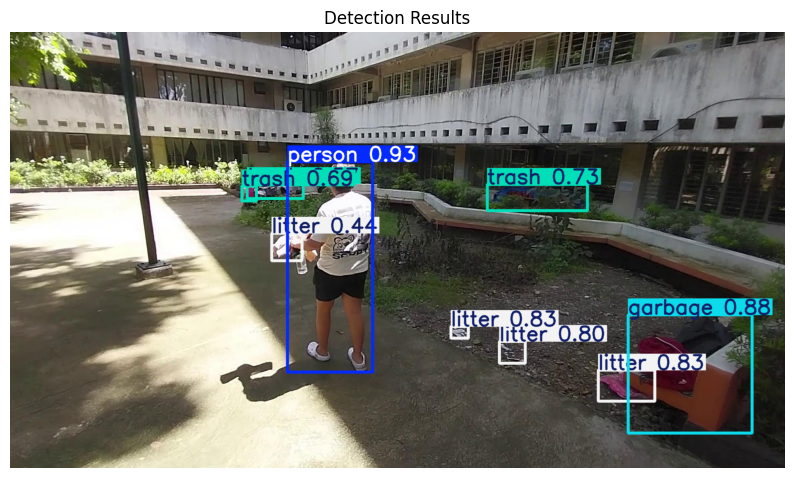

In [ ]:


# -------------------
# Load the Trained Model
# -------------------
model = YOLO(r"C:\Users\User\littering_project\littering_detection2\weights\best.onnx")  # Path to fine-tuned model

# -------------------
# Run Inference on a Sample Image
# -------------------
image_path = r"C:\Users\User\Desktop\Nouveau dossier (3)\video_1_3_jpg.rf.52025a317199ad5860ac814355a263f8.jpg"  # Change to your test image path
results = model(image_path)  # Perform detection

# -------------------
# Visualize the Detection Results
# -------------------
for result in results:
    img_with_boxes = result.plot()  # Get image with drawn detections

# Convert to RGB for display in matplotlib
img_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Detection Results")
plt.show()


## 📌 Detection Results Analysis

The output image showcases the **model's ability to detect and classify littering-related objects**. Key observations:

- The **person** in the image was detected with a **confidence score of 0.93**, indicating a strong classification.
- **Trash, litter, and garbage** were successfully detected, with confidence values ranging between **0.44 and 0.88**.
- Multiple **instances of litter** were correctly labeled, highlighting the model’s effectiveness in **detecting small objects**.
- The **bounding boxes are well-aligned**, meaning the model generalizes well even in **outdoor environments**.

This successful detection confirms that the **fine-tuned YOLO model is now ready for deployment** in real-world **litter monitoring and smart surveillance applications**! 🚀
